<a href="https://colab.research.google.com/github/satria-siregar/PSDS-2.0-Kelas-Mahir/blob/main/Tensorflow_Data_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

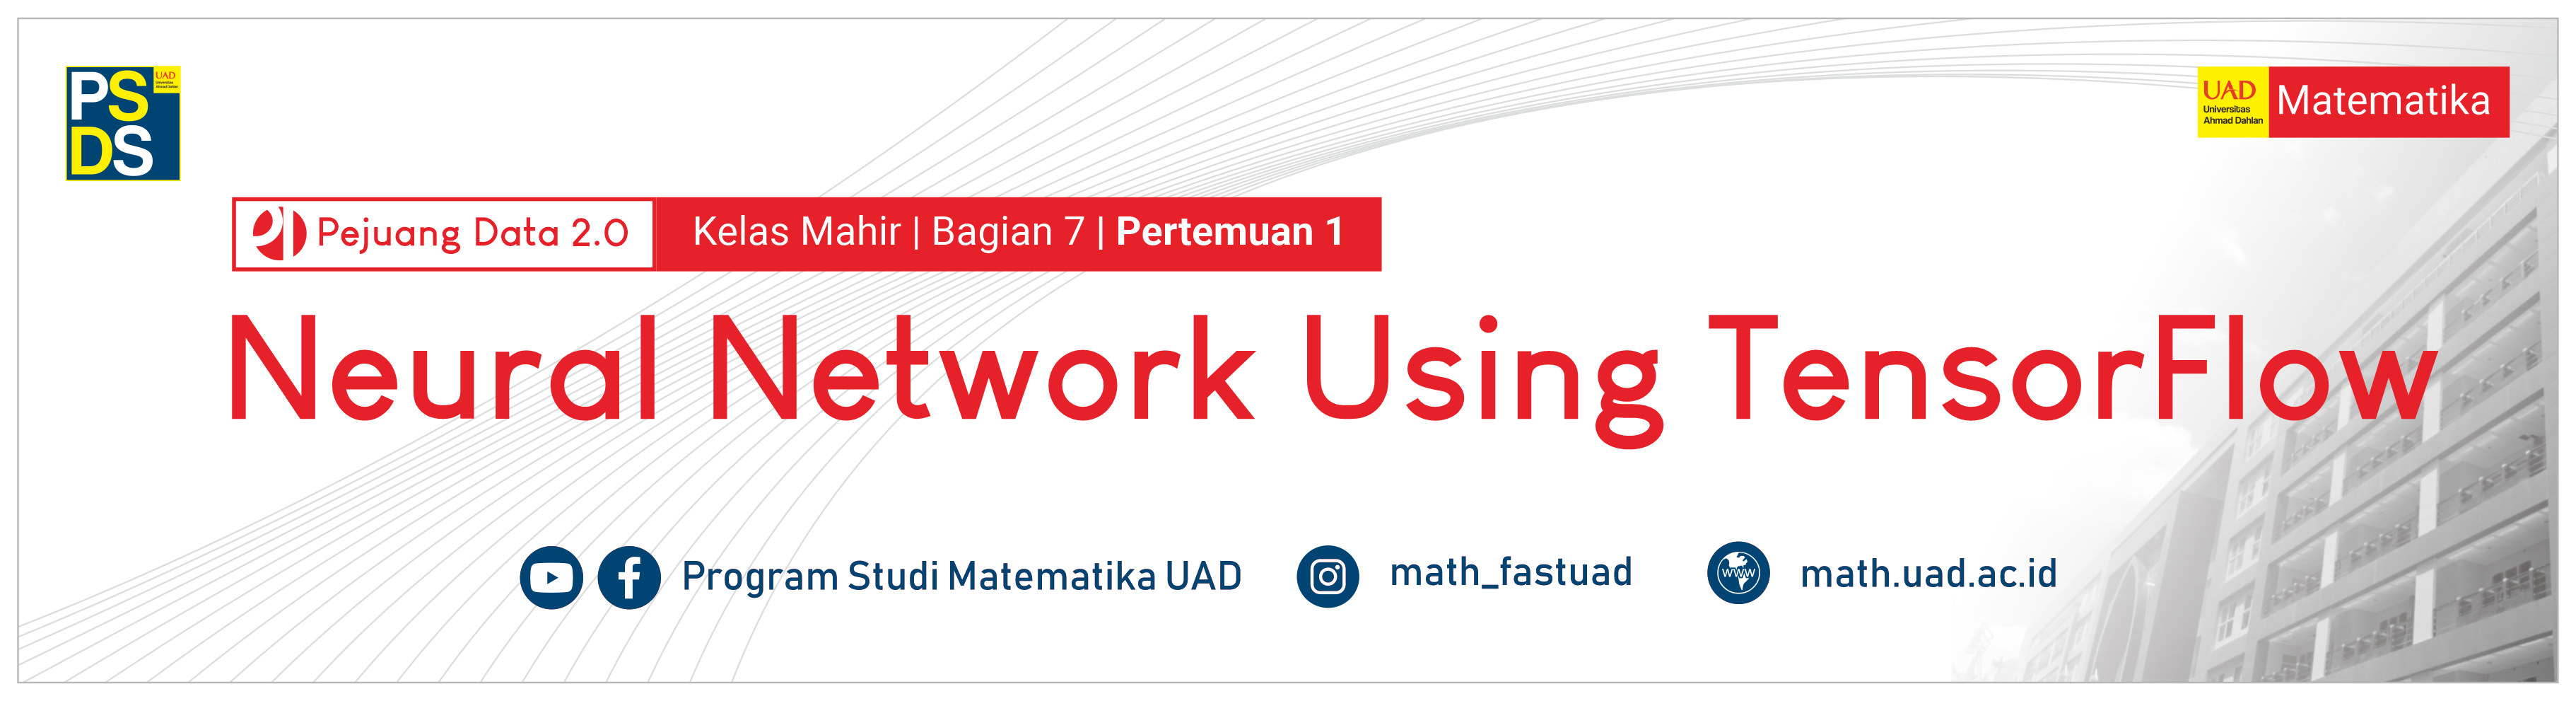

# **Model Neural Network untuk Klasifikasi Gambar**

### Representasi Citra Digital

Dalam sebuah komputer, citra digital dipetakan menjadi bentuk grid dan elemen piksel berbentuk matriks 2 dimensi. Setiap piksel-piksel tersebut memiliki angka yang mempresentasikan channel warna. Angka pada setiap piksel disimpan secara berurutan oleh sebuah komputer dan sering dikurangi untuk keperluan kompresi maupun pengolahan tertentu. Sebuah citra digital dapat mewakili oleh sebuah matriks yang terdiri dari M baris N kolom, dimana perpotongan antara kolom dan baris disebut piksel. 
(**pixel = picture element**), yaitu elemen terkecil dari sebuah citra. Piksel mempunyai dua parameter, yaitu koordinat dan intensitas atau warna. Nilai yang terdapat pada koordinat $(\ x, y)$ adalah $\ f(x, y) $, yaitu besar intensitas atau warna dari piksel di titik itu. Oleh karena itu, citra dapat dituliskan kedalam sebuah matriks :

$$ 
\begin{eqnarray}
\ f(x,y) &=& \begin{bmatrix}
f(0,0) & f(0,1) & \ldots & f(0,N-1)\\
f(1,0) & f(1,1) & \ldots & f(1,N-1)\\
\vdots & \vdots & \vdots & f(0,N-1)\\
f(M-1,0) & f(M-1,1) & \ldots & f(M-1,N-1)
\end{bmatrix}
\end{eqnarray}
$$

Berdasarkan rumus diatas, suatu citra $\ f(x, y) $ dapat dituliskan kedalam fungsi matematis seperti berikut ini :

$$
\begin{eqnarray} 
0  \leq  x   \leq M-1\\
0  \leq  y   \leq N-1\\
0  \leq  f(x,y)   \leq G-1\\
\end{eqnarray}
$$

Dimana : 

M = jumlah piksel baris pada array citra 

N = jumlah piksel kolom pada array citra 

G = nilai skala keabuan (grayscale ) 

Besarnya nilai M, N, dan G biasanya merupakan perpengkatan dari dua seperti yang terlihat pada persamaan berikut : 

$\ M = 2m ; N = 2n; G =2k 	$

Dimana nilai m, n, dan k merupakan bilaingan positif. Interval (0, G) disebut dengan (grayscale). Besarnya nilai G tergantung pada proses digitalisasinya. Biasanya keabuan 0 (nol) menyatakan  intensitas hitam dan 1 (satu) menyatakan intensitas putih. Untuk citra 8 bit, nilai G sama dengan 28 = 256 warna (derajat keabuan).

**Catatan Penting:**

Interval nilai untuk nilai Grayscale adalah 0-255

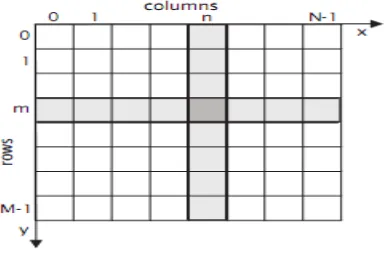

### Citra Digital MNIST

Dataset MNIST berisi 70.000 gambar grayscale dalam 10 kategori. Setiap gambar menunjukkan suatu foto angka dengan resolusi rendah (28 kali 28 piksel), seperti yang terlihat di sini:

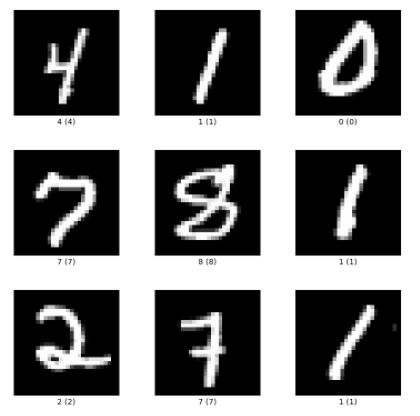

Dataset ini terdiri atas 60.000 gambar digunakan untuk melatih model dan 10.000 gambar untuk mengevaluasi seberapa akurat model untuk mengklasifikasikan gambar. Kita dapat mengakses dataset MNIST langsung dari TensorFlow.

#### **Import Library**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#### **Import Dataset**

Dataset MNIST telah disediakan oleh web TensorFlow. Untuk mengolahnya, kita tidak perlu mendownload terlebih dahulu. Selama ada koneksi internet, kita bisa langsung meng-import dataset tersebut

In [ ]:
mnist = tf.keras.datasets.mnist

(gambar_latih, label_latih), (gambar_uji, label_uji) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Kita telah berhasil memuat data dalam empat array Numpy yaitu:

* `gambar_latih` dan `label_latih` untuk melakukan pelatihan/pebelajaran model
* Kemudian model yang dihasilkan diuji akurasinya menggunakan data `gambar_uji` dan `label_uji`

Gambar ini merupakan adalah array NumPy berukuran 28x28, dengan nilai piksel mulai dari 0 hingga 255. Label adalah array  bilangan bulat, mulai dari 0 hingga 9. Ini sesuai dengan kelas pakaian yang mewakili gambar dengan rincian sebagai berikut:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0 (zero)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1 (one)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>2 (two)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>3 (three)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>4 (four)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>5 (five)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>6 (six)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>7 (seven)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>8 (eight)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>9 (nine)</td>
  </tr>
</table>

Setiap gambar dipetakan ke suatu label. Karena nama kelas tidak disertakan dengan kumpulan data, simpan di sini untuk digunakan nanti saat memplot gambar:

In [ ]:
nama_kelas = ['0 (zero)', '1 (one)', '2 (two)', '3 (three)', '4 (four)',
               '5 (five)', '6 (six)', '7 (seven)', '8 (eight)', '9 (nine)']

#### **Dimensi Data**

In [ ]:
gambar_latih.shape

(60000, 28, 28)

In [ ]:
gambar_uji.shape

(10000, 28, 28)

Di sini kita memiliki 60.000 gambar latih sebagai data training dan 10.000 gambar uji sebagai data test dengan kedua data tersebut berukuran 28 x 28 piksel

In [ ]:
len(label_latih)

60000

In [ ]:
len(label_uji)

10000

Data tersebut juga sudah memiliki label masing masing. Sehingga klasifikasi gambar yang akan kita lakukan termasuk ke dalam kategori *supervised learning*

#### **Visualisasi Data**

Setelah mengetahui dimensi dataset tersebut, kita coba untuk melakukan visualisasi data

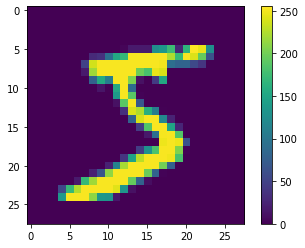

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(gambar_latih[0])
plt.colorbar()
plt.grid(False)
plt.show()

Untuk melakukan proses pemodelan, skalakan nilai ini ke rentang 0 hingga 1 sebelum memasukkannya ke model Neural Network. Untuk melakukannya, bagi nilai dengan 255. Penting bahwa himpunan pelatihan dan himpunan pengujian diproses sebelumnya dengan cara yang sama:

In [ ]:
gambar_latih = gambar_latih / 255.0

gambar_uji = gambar_uji / 255.0

Untuk memverifikasi bahwa data dalam format yang benar dan kita siap untuk membangun dan melatih model, mari kita tampilkan 25 gambar pertama dari himpunan pelatihan dan tampilkan nama kelas di bawah setiap gambar.

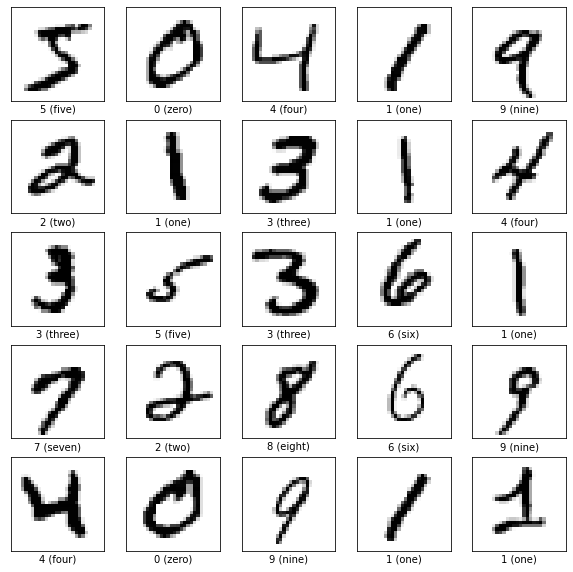

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gambar_latih[i], cmap=plt.cm.binary)
    plt.xlabel(nama_kelas[label_latih[i]])
plt.show()

#### **Membangun Model Neural Network**

Pada penjelasan sebelumnya, kita telah melihat 25 data pertama yang terdapat di data training (gambar latih). Sekarang mari kita buat model Neural Network untuk klasifikasi gambar tersebut.

In [ ]:
# Membangun Model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),                   # layer Input
    tf.keras.layers.Dense(128, activation='relu'),                   # Hiden Layer Pertama
    tf.keras.layers.Dense(10)                                        # Layer Output
])

Model Neural Network terdiri dari 3 layer utama yaitu *Layer Input, Layer Hiden/Layer Model Lainnya, dan Layer Output*.

Pada layer pertama digunakan jenis layer `Flatten`, ini berfungsi untuk mengubah array berukuran 28 x 28 menjadi 1 x 28*28 yaitu 1 x 784 pixel. Proses ini perlu dan harus dilakukan karena data input yang diolah harus berdimensi 1 x n.

Setelah piksel diratakan(Flatten), layer selanjutnya terdiri dari urutan dua lapisan Dense. Ini merupakan layer-layer yang sepenuhnya terhubung. Layer Dense merupakan Hiden layer dengan titik(node) sebanyak 128 titik.

Kemudian lapisan terakhir adalah layer output. Karena data ini memiliki sepuluh label, maka kita beri parameter 10 yang akan menghasilkan array logits dengan panjang 10. Array ini adalah array dengan nilai probabilitas di masing-masing kelas. Kelas dengan nilai probabilitas tertinggi akan menjadi kelas hasil prediksi.

Langkah selanjutnya adalah melakukan kompilasi model. Pada langkah ini, seperti sebelumnya, kita harus mendefinisikan dua fungsi utama dan memungkinkan menentukan beberapa fungsi lainnya. Dua hal yang harus ditentukan adalah:

1. Fungsi `Loss` atau fungsi kerugian: Fungsi ini mengukur tingkat kesalah model yang dihasilkan
2. Fungsi `Optimizer` atau fungsi optimasi: Fungsi ini bertugas untuk melakukan optimisasi model.
3. Fungsi `Metrik`, ini tidak wajib. Fungsi ini berfungsi untuk menampilkan ukuran tertentu, biasanya Akurasi

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fungsi Loss
              
              optimizer='adam',                                                      # Fungsi Optimasi
              
              metrics=['accuracy'])                                                  # Metrik akurasi

Langkah selanjutnya adalah melakukan pelatihan model dengan metode `model.fit` sebagai berikut:

In [ ]:
model.fit(gambar_latih,                         # Data latih
          label_latih,                          # Label latih
          epochs=10)                            # Epoch(iterasi)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1112 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0231 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

Saat model pelatihan, metrik kerugian dan akurasi ditampilkan. Model ini mencapai akurasi sekitar 0,99 (atau 99%) pada data pelatihan.

Selanjutnya, bandingkan performa model pada himpunan data pengujian:

In [ ]:
test_loss, test_acc = model.evaluate(gambar_uji,  label_uji, verbose=2)

print('\nTingkat Akurasi Pengujian:', test_acc)

313/313 - 0s - loss: 0.0763 - accuracy: 0.9798

Tingkat Akurasi Pengujian: 0.9797999858856201


Ternyata keakuratan pada set data uji sedikit lebih rendah daripada keakuratan pada set data pelatihan. Kesenjangan antara akurasi pelatihan dan akurasi pengujian ini menunjukkan overfitting . Overfitting terjadi saat model machine learning berperforma lebih buruk pada input baru yang sebelumnya tidak terlihat daripada pada data pelatihan. Model overfitted "mengingat" noise dan detail dalam set data pelatihan ke titik yang berdampak negatif pada performa model pada data baru.

Dengan model yang telah dilatih, kita dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. Nilai output ini akan diubah menjadi nilai probabilitas menggunakan fungsi `Softmax` sehingga lebih mudah diinterpretasikan.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

prediksi = probability_model.predict(gambar_uji)

Di sini, model telah memprediksi label untuk setiap gambar di set pengujian. Mari kita lihat prediksi pertama:

In [ ]:
prediksi[0]

array([4.5398221e-10, 2.9106167e-10, 1.2301347e-08, 1.6716231e-03,
       1.6474527e-12, 9.1274113e-11, 2.8444898e-13, 9.9832219e-01,
       2.9513478e-10, 6.2422091e-06], dtype=float32)

Prediksi adalah array angka dengan panjang 10. Mereka mewakili "kemungkinan" model bahwa gambar tersebut sesuai dengan masing-masing dari 10 kelas gambar angka yang berbeda. Kita dapat melihat label mana yang memiliki nilai kemungkinan tertinggi:

In [ ]:
np.argmax(prediksi[0])

7

Jadi, model paling yakin bahwa gambar ini adalah **angka 7**, atau `nama_kelas[7]` . Pemeriksaan label uji menunjukkan bahwa klasifikasi ini benar:

In [ ]:
label_uji[0]

7

##### **Blok Kode Lengkap**

Setelah pembahasan yang cukup panjang, kita tuliskan kembali kode kode tersebut ke dalam blok kode utuh

In [2]:
# Impor Library Tensor Flow
import tensorflow as tf

# Mengunduh dataset
mnist = tf.keras.datasets.mnist

# Membuka dataset dan menyimpanya menjadi data array latih dan uji
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Melakukan penyiapan data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membangun model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                 # Layer Input      
  tf.keras.layers.Dense(512, activation=tf.nn.relu),             # Layer Hiden
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)            # Layer Output
])

# Kompilasi Model
model.compile(loss='sparse_categorical_crossentropy',            # Fungsi loss
              optimizer='adam',                                  # Fungi Optimasi
              metrics=['accuracy'])                              # Metrik Akurasi

# Melatih model
model.fit(x_train,                                               # Data Latih
          y_train,                                               # Label Latih
          epochs=10)                                             # Iterasi yang diinginkan

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test,                     # Data Uji
                                     y_test,                     # Label Uji
                                     verbose=2)

print('\nTingkat Akurasi Pengujian:', test_acc)

# Contoh Prediksi
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediksi = probability_model.predict(x_test)
y_test[0]

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2008 - accuracy: 0.9415
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0805 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0282 - accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0199 - accuracy: 0.9935
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 10/10
1875/

7

#### **Fungsi Callback**

Pada proses sebelumnya, pelatihan model akan berhenti jika jumlah iterasi yang kita inginkan(epoch) selesai dilakukan. Bagaimana jika kita mengganti kriteria ini dengan nilai akurasi yang kita inginkan. Kita dapat melakukannya dengan membuat fungsi callback seperti di bawah ini.

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nModel telah mencapai akurasi 99%, proses Pelatihan dihentikan!")
            self.model.stop_training = True
callbacks = myCallback()

In [6]:
# Impor Library Tensor Flow
import tensorflow as tf

# Mengunduh dataset
mnist = tf.keras.datasets.mnist

# Membuka dataset dan menyimpanya menjadi data array latih dan uji
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Melakukan penyiapan data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membangun model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),                 # Layer Input      
  tf.keras.layers.Dense(512, activation=tf.nn.relu),             # Layer Hiden
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)            # Layer Output
])

# Kompilasi Model
model.compile(loss='sparse_categorical_crossentropy',            # Fungsi loss
              optimizer='adam',                                  # Fungi Optimasi
              metrics=['accuracy'])                              # Metrik Akurasi

# Melatih model
# Melatih model
model.fit(x_train,                                               # Data Latih
          y_train,                                               # Label Latih
          epochs=10,                                             # Iterasi yang diinginkan
          callbacks=[callbacks])                                 # Kriterian henti(Callback)

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test,                     # Data Uji
                                     y_test,                     # Label Uji
                                     verbose=2)

print('\nTingkat Akurasi Pengujian:', test_acc)

# Contoh Prediksi
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prediksi = probability_model.predict(x_test)
y_test[0]

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2029 - accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0817 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0283 - accuracy: 0.9911

Model telah mencapai akurasi 99%, proses Pelatihan dihentikan!
313/313 - 1s - loss: 0.0676 - accuracy: 0.9792

Tingkat Akurasi Pengujian: 0.979200005531311


7

Dengan menggunakan fungsi `callback` ternyata dapat membantu kita mengurangi jumlah epoch sehingga mengurangi beban komputasi. Tentu hal ini akan berbeda tergantung dari jenis data maupun metode yang digunakan. Akan tetapi fungsi `callback` terhitung cukup membantu untuk mendapatkan hasil akurasi yang baik